<a href="https://colab.research.google.com/github/MoreiraErick/learning-python/blob/modulo-1-fundamentos-em-python/BootcampIGTI_Aula_Interativa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Online - Desenvolvedor(a) Python IGTI**
# Aula Interativa 1
**Data:** 09/03/2021
**Professor:** Erick Faria
**Fonte:** Códigos adaptados de [codigoquant](https://gtihub.com/codigoquant)

# **Exemplo de aplicação do Python para Análise Financeira**

# Exemplo 1 - Criando um Ranking de Ações

## Parte 1 - Importação e Instalação dos pacotes e módulos

In [ ]:
# Importação dos pacotes

import numpy as np # Pacote indicado para trabalhar com números
import pandas as pd # Pacote indicado para lidar com Data Frames
import seaborn as sns # Pacote indicado para representações gráficas
import matplotlib.pyplot as plt # Pacote indicado para representações gráficas
import pandas_datareader.data as web # Função para ler dados na web
import requests # Pacote para fazer requisições a sites

from google.colab import files

import warnings # Módulo para ignorar erros
warnings.filterwarnings('ignore')

!pip install yfinance --upgrade --no-cache-dir # Instala o pacote yfinance
import yfinance as yf # Módulo para ler as cotações
yf.pdr_override() # Sobrescreve pelo método yfinance

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.55)


## Parte 2 - Leitura dos dados



In [ ]:
url = 'https://www.fundamentus.com.br/resultado.php' # Variável com a url

header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header) # Lê os arquivos do site fundamentus

## Parte 3 - Criação, Limpeza e Padronização dos dados (DataFrame)

**Após ler os dados, vamos criar o DataFrame com as informações**

In [ ]:
# Cria o DF
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

# Define o DF com os stickers das Ações que vou analisar
carteira = df[df['Papel'].isin(['TAEE11', 'NEOE3', 'CMIG4', 'CPFE3', 'KLBN11', 'BBAS3'])]

In [ ]:
carteira

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
96,KLBN11,29.56,-13.35,8.72,2.780,"0,00%",0.942,4.63,11.59,-1.65,18.50,10.10,"23,98%","-20,00%",2.98,"10,73%","-65,29%",254873000.0,3.810300e+09,6.91,"13,29%"
478,TAEE11,31.70,4.83,1.81,3.066,"10,13%",0.774,7.19,4.59,-1.91,6.84,6.80,"66,80%","63,54%",2.80,"18,13%","37,55%",75721100.0,6.025900e+09,1.04,"27,01%"
523,BBAS3,29.20,6.69,0.72,0.000,"5,05%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","10,72%",806176000.0,1.167230e+11,0.00,"-7,88%"
529,NEOE3,16.07,6.94,0.92,0.610,"2,79%",0.294,6.55,3.51,-0.65,7.35,5.67,"17,37%","9,08%",1.25,"9,76%","13,27%",40182000.0,2.116700e+10,1.25,"20,48%"
564,CMIG4,11.48,8.59,1.01,0.704,"5,27%",0.327,2.74,3.45,-0.85,5.63,4.72,"20,40%","8,20%",1.70,"10,92%","11,73%",136825000.0,1.729770e+10,0.93,"7,26%"
578,CPFE3,28.47,9.32,2.26,1.107,"6,33%",0.647,11.15,6.54,-1.65,8.95,6.99,"16,91%","12,06%",1.23,"12,64%","24,22%",82574600.0,1.453470e+10,1.39,"11,76%"


**Agora vamos fazer algumas substituições para manipular os dados em Python.**   
**Vamos substituir as vírgulas por pontos, retirar o sinal de % e remover alguns pontos**

In [ ]:
# As substituições serão nas colunas ('Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a')

for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  carteira[coluna] = carteira[coluna].str.replace('.', '')
  carteira[coluna] = carteira[coluna].str.replace(',', '.')
  carteira[coluna] = carteira[coluna].str.rstrip('%').astype('float') / 100

In [ ]:
carteira

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
96,KLBN11,29.56,-13.35,8.72,2.780,0.0000,0.942,4.63,11.59,-1.65,18.50,10.10,0.2398,-0.2000,2.98,0.1073,-0.6529,254873000.0,3.810300e+09,6.91,0.1329
478,TAEE11,31.70,4.83,1.81,3.066,0.1013,0.774,7.19,4.59,-1.91,6.84,6.80,0.6680,0.6354,2.80,0.1813,0.3755,75721100.0,6.025900e+09,1.04,0.2701
523,BBAS3,29.20,6.69,0.72,0.000,0.0505,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1072,806176000.0,1.167230e+11,0.00,-0.0788
529,NEOE3,16.07,6.94,0.92,0.610,0.0279,0.294,6.55,3.51,-0.65,7.35,5.67,0.1737,0.0908,1.25,0.0976,0.1327,40182000.0,2.116700e+10,1.25,0.2048
564,CMIG4,11.48,8.59,1.01,0.704,0.0527,0.327,2.74,3.45,-0.85,5.63,4.72,0.2040,0.0820,1.70,0.1092,0.1173,136825000.0,1.729770e+10,0.93,0.0726
578,CPFE3,28.47,9.32,2.26,1.107,0.0633,0.647,11.15,6.54,-1.65,8.95,6.99,0.1691,0.1206,1.23,0.1264,0.2422,82574600.0,1.453470e+10,1.39,0.1176


**Agora vamos criar um ranking em nossa Carteira de ações.**
**No exemplo a seguir vamos utilizar a função sort.**
**As colunas utilizadas serão EV/EBIT e ROIC.**
**Posteriormente você pode modificar e utilizar outras colunas.**

In [ ]:
ranking = pd.DataFrame() # Cria o DF chamado ranking
ranking['pos'] = range(1,6) # Cria uma coluna que vai dar a posição no Ranking
ranking['EV/EBIT'] = carteira[carteira['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:5].values
ranking['ROIC'] = carteira.sort_values(by=['ROIC'], ascending=False)['Papel'][:5].values

In [ ]:
ranking

,pos,EV/EBIT,ROIC
0,1,CMIG4,TAEE11
1,2,TAEE11,CPFE3
2,3,NEOE3,CMIG4
3,4,CPFE3,KLBN11
4,5,KLBN11,NEOE3


# Exemplo 2 - Representação Gráfica da Carteira de Ações

## Parte 1 - Importa os Dadsos

**Nesse exemplo, vamos usar os dados do Yahoo Finance**

In [ ]:
# Faz a leitura dos dados do Ibovespa e define o período que desejamos.

ibov = web.get_data_yahoo('^BVSP', start='2011-03-09', end='2021-03-09')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Imprime as 5 primeiras linhas

ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-03-09,68010.0,68057.0,67109.0,67264.0,67264.0,1407600
2011-03-10,67256.0,67256.0,65854.0,66041.0,66041.0,2375000
2011-03-11,66041.0,67014.0,65559.0,66685.0,66685.0,2491000
2011-03-14,66684.0,67333.0,66088.0,67169.0,67169.0,1874200
2011-03-15,67168.0,67168.0,65463.0,67005.0,67005.0,2852200


In [ ]:
# Imprime as 5 últimas linhas

ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-02,110328.0,112428.0,107319.0,111540.0,111540.0,14823200
2021-03-03,111529.0,112398.0,107466.0,111184.0,111184.0,15144300
2021-03-04,111191.0,114433.0,111163.0,112690.0,112690.0,14221600
2021-03-05,112690.0,115504.0,112504.0,115202.0,115202.0,13254800
2021-03-08,115202.0,115202.0,110268.0,110612.0,110612.0,0


## Parte 2 - Faz a plotagem (gera os gráficos)

### Gráfico 1



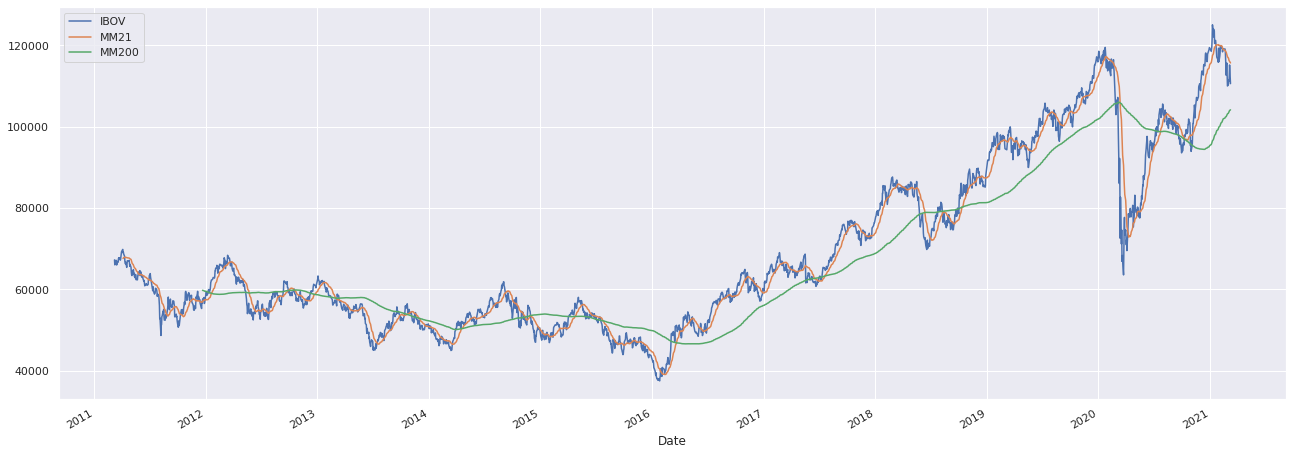

In [ ]:
ibov["Close"].plot(figsize=(22,8), label="IBOV") # Linha IBOV
ibov["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

### Gráfico 2

**Agora vamos mudar o eixo x do gráfico.**
**Nesse exemplo vamos analisar o IBOV no ano de 2020**

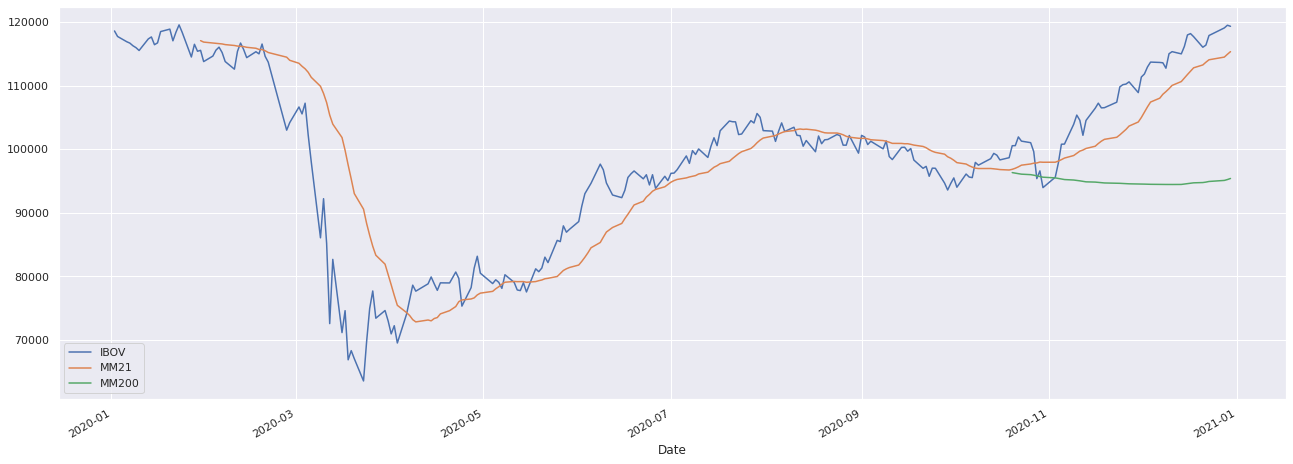

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020] # Aqui definimos o ano de 2020
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

### Gráfico 3

**Agora vamos analizar entre dois períodos**

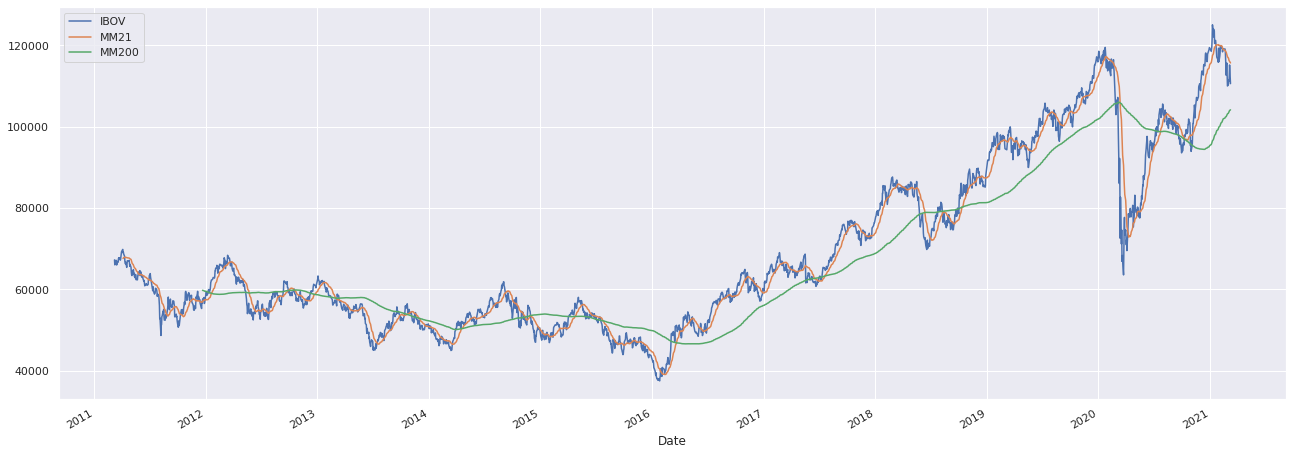

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2011) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

**Lendo os valores que geraram os Gráficos**

In [ ]:
# Todos os dados referente ao mês 12 (Dezembro)

ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-12,86420.0,87946.0,86420.0,86977.0,86977.0,5000500
2018-12-13,86979.0,87842.0,86856.0,87838.0,87838.0,3658600
2018-12-14,87838.0,88184.0,87106.0,87450.0,87450.0,3553300
2018-12-17,87448.0,87820.0,86328.0,86400.0,86400.0,3849300
2018-12-18,86400.0,87274.0,86400.0,86610.0,86610.0,4093500
2018-12-19,86617.0,88101.0,85674.0,85674.0,85674.0,5664200
2018-12-20,85678.0,86584.0,84756.0,85269.0,85269.0,6100500
2018-12-21,85269.0,86554.0,85134.0,85697.0,85697.0,6076200
2018-12-26,85684.0,85684.0,83892.0,85136.0,85136.0,3355100


In [ ]:
# Todos os dados referente ao dia 14 de cada mês

ibov_fatiado = ibov[ibov.index.day == 14]
ibov_fatiado.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-14,48038.0,48281.0,47372.0,47646.0,47646.0,3697200
2015-04-14,54240.0,54625.0,53773.0,53982.0,53982.0,3747100
2015-05-14,56376.0,56921.0,56105.0,56657.0,56657.0,3209800
2015-07-14,53119.0,53416.0,52653.0,53239.0,53239.0,2740900
2015-08-14,48010.0,48186.0,47508.0,47508.0,47508.0,2878900
2015-09-14,46400.0,47386.0,46218.0,47282.0,47282.0,3579400
2015-10-14,47349.0,47715.0,46701.0,46710.0,46710.0,6141700
2015-12-14,45258.0,45258.0,44531.0,44747.0,44747.0,2481600
2016-01-14,38944.0,39502.0,38459.0,39500.0,39500.0,3868600


# Exemplo 3 - Simulando uma carteira de Ações em comparação ao Ibov

## Parte 1 - Importação dos dados

In [ ]:
# Definindo os papeis que queremos analisar
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA OIBR3.SA VALE3.SA"

carteira = yf.download(tickers, period='5y')["Adj Close"]

ibov = yf.download('^BVSP', period='5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


## Parte 2 - Limpeza dos dados

In [ ]:
# Aqui vamos fazer as exclusão dos valores NaN (Missing)da carteira
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,OIBR3.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-03-09,16.124336,5.016053,0.962716,11.869423,9.805816
2016-03-10,16.107042,5.202063,0.880624,11.460135,9.728048
2016-03-11,15.752565,5.295066,0.791069,11.353719,9.629074
2016-03-14,15.596944,5.257864,0.828384,11.001728,9.544234
2016-03-15,15.821736,4.954049,0.843310,11.034471,9.544234
...,...,...,...,...,...
2021-03-03,14.170000,9.990000,1.760000,96.024124,77.000000
2021-03-04,14.780000,10.210000,1.800000,94.598358,73.230003
2021-03-05,15.080000,10.370000,1.990000,100.209999,73.040001


In [ ]:
# Aqui vamos fazer as exclusão dos valores NaN (Missing)do IBOV
ibov.dropna(inplace=True)
ibov

Date
2016-03-09     48665.000000
2016-03-10     49571.000000
2016-03-11     49639.000000
2016-03-14     48867.000000
2016-03-15     47130.000000
                  ...      
2021-03-03    111184.000000
2021-03-04    112690.000000
2021-03-05    115202.000000
2021-03-08    110612.000000
2021-03-09    110681.226562
Name: Adj Close, Length: 1235, dtype: float64

## Parte 3 - Representação Gráfica

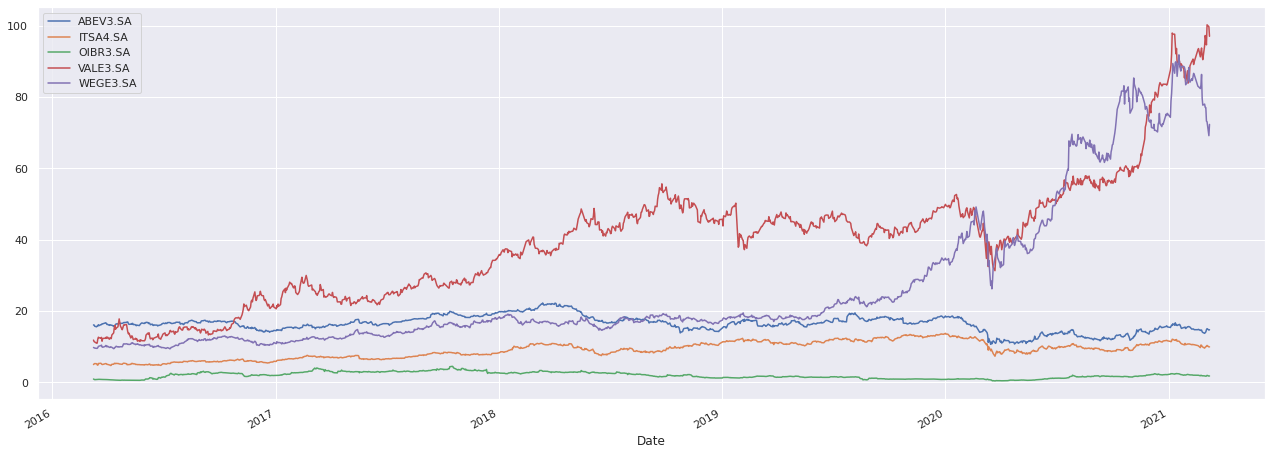

In [ ]:
# Vamos fazer a plotagem do Gráfico
sns.set()
carteira.plot(figsize=(22,8));

## Parte 4 - Tratamento dos dados e Representação Gráfica

Agora vamos utilizar um método muito comum no mercado financeiro que é normalizar a carteira. Alguns analistas utilizam esse método para tirar distorções dos papeis e permitir a comparação entre eles.

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000 # Faz a normalização da Carteira
carteira_normalizada.dropna(inplace=True) # Apaga os missing

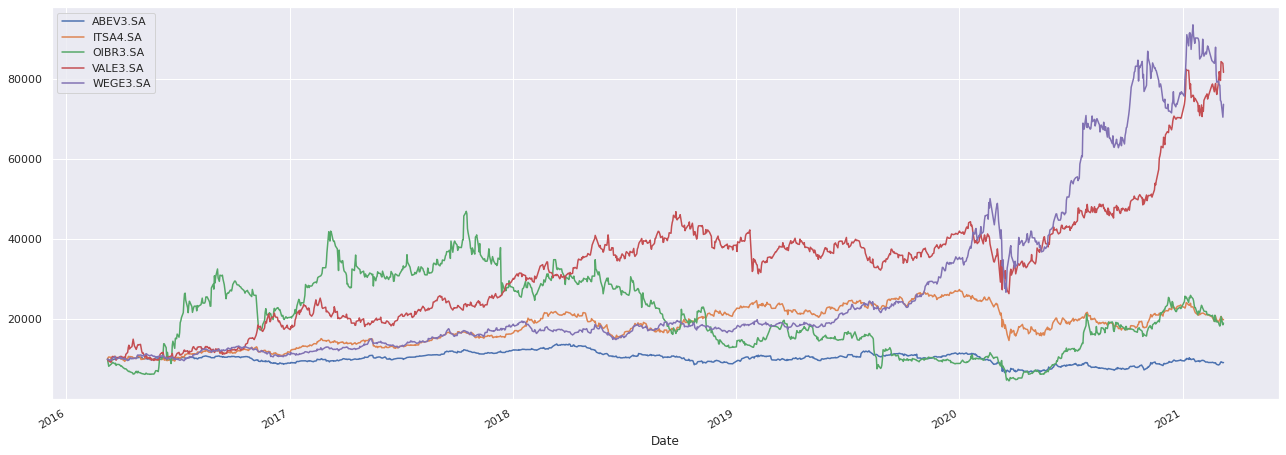

In [ ]:
# Gera o gráfico da Carteira Normalizada
carteira_normalizada.plot(figsize=(22,8));

In [ ]:
# Cria a Coluna Saldo da Carteira Normalizada
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,OIBR3.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2016-03-09,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2016-03-10,9989.274641,10370.829204,9147.287585,9655.174935,9920.692603,49083.258967
2016-03-11,9769.434938,10556.240479,8217.054508,9565.518763,9819.758391,47928.007079
2016-03-14,9672.921490,10482.075779,8604.655957,9268.966266,9733.238489,47761.857982
2016-03-15,9812.333418,9876.388681,8759.696661,9296.551854,9733.238489,47478.209103
...,...,...,...,...,...,...
2021-03-03,8787.958687,19916.058150,18281.611824,80900.415170,78524.828919,206410.872750
2021-03-04,9166.268621,20354.650563,18697.102607,79699.205977,74680.175135,202597.402903
2021-03-05,9352.322909,20673.626173,20670.686307,84427.018754,74486.410080,209610.064223


In [ ]:
# Faz o método de normalizar com o IBOV
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2016-03-09     50000.000000
2016-03-10     50930.853796
2016-03-11     51000.719203
2016-03-14     50207.541354
2016-03-15     48422.891195
                  ...      
2021-03-03    114234.049111
2021-03-04    115781.362375
2021-03-05    118362.272681
2021-03-08    113646.357752
2021-03-09    113717.483368
Name: Adj Close, Length: 1235, dtype: float64

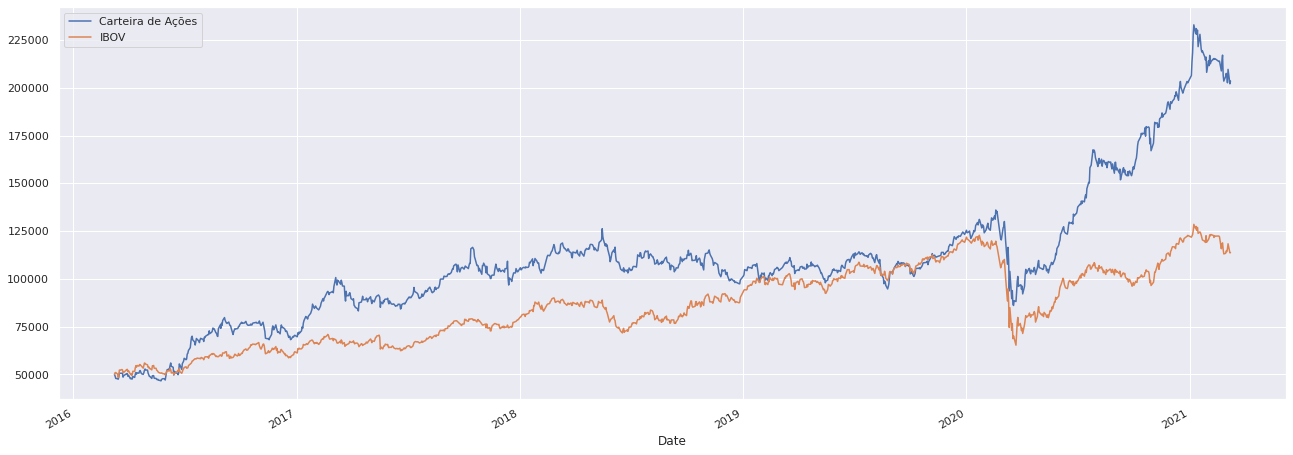

In [ ]:
# Gera um gráfico comparativo entre a carteira e o IBOV normalizados
carteira_normalizada["saldo"].plot(figsize=(22,8), label="Carteira de Ações")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
# Utiliza a função describe para gerar os valores de estatística descritiva
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,OIBR3.SA,VALE3.SA,WEGE3.SA,saldo
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,10204.381084,18085.555598,20764.127821,33023.348411,26804.536708,108881.949621
std,1380.644659,4683.387049,9237.579437,14738.289088,20990.286410,35252.395554
min,6632.769468,9456.116660,4570.402956,9268.966266,9606.509071,46622.069906
25%,9500.415553,14132.469218,13191.844769,21491.048685,13707.791265,90652.933230
50%,10289.700627,18191.412553,19735.830805,34979.026180,18042.318610,105815.294252
75%,10968.974174,21741.180720,28682.187763,39852.466561,29374.995076,114272.866698
max,13815.326275,27429.240667,46976.774077,84427.018754,93615.122840,232910.370747


# Exemplo 4 - Correlação entre Dólar e o Ibovespa

## Parte 1 - Faz a importação dos dados

In [ ]:
# Cria a Carteira e importa os dados.
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2011-01-01")["Close"] # Define a data de início

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira

,USDBRL=X,^BVSP
Date,,
2011-01-03,1.6155,69962.000000
2011-01-04,1.6465,70318.000000
2011-01-05,1.6675,71091.000000
2011-01-06,1.6750,70579.000000
2011-01-07,1.6859,70057.000000
...,...,...
2021-03-03,5.6751,111184.000000
2021-03-04,5.6175,112690.000000
2021-03-05,5.6683,115202.000000


## Parte 2 - Faz a limpeza dos dados

In [ ]:
# Limpa os dados NaN (Missing)
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2011-01-03,1.6155,69962.000000
2011-01-04,1.6465,70318.000000
2011-01-05,1.6675,71091.000000
2011-01-06,1.6750,70579.000000
2011-01-07,1.6859,70057.000000
...,...,...
2021-03-03,5.6751,111184.000000
2021-03-04,5.6175,112690.000000
2021-03-05,5.6683,115202.000000


In [ ]:
# Cria a carteira com colunas de Dolar e o IBOV
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2011-01-03,1.6155,69962.000000
2011-01-04,1.6465,70318.000000
2011-01-05,1.6675,71091.000000
2011-01-06,1.6750,70579.000000
2011-01-07,1.6859,70057.000000
...,...,...
2021-03-03,5.6751,111184.000000
2021-03-04,5.6175,112690.000000
2021-03-05,5.6683,115202.000000


## Parte 3 - Faz a plotagem dos Gráficos

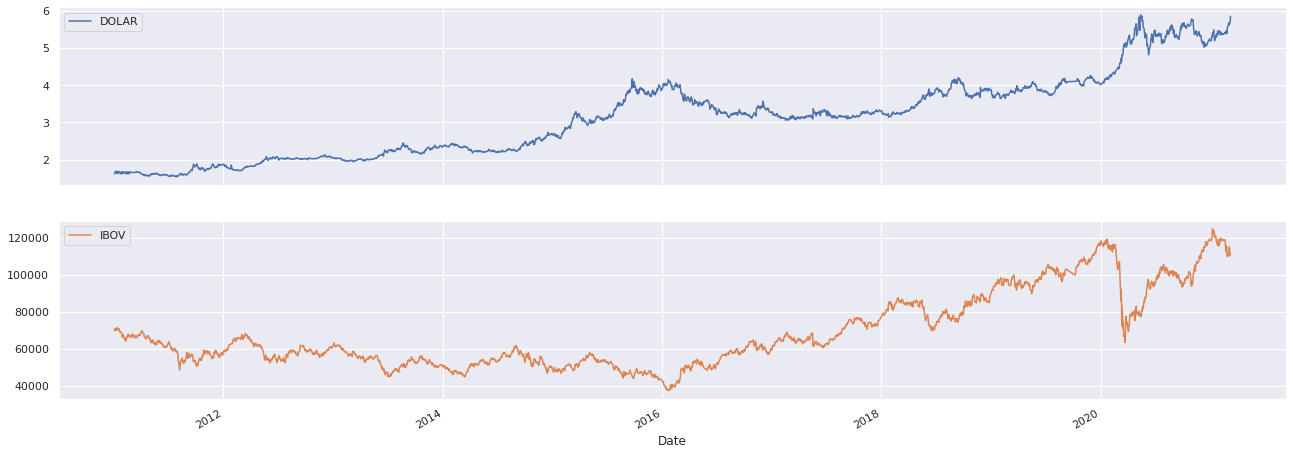

In [ ]:
# Faz a plotagem dos Gráficos

sns.set()
carteira.plot(subplots=True, figsize=(22,8)); # Aqui foi utilizado a opção subplots

## Parte 4 - Análises dos dados e plotagens

In [ ]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2011-01-04,0.019189,0.005088
2011-01-05,0.012754,0.010993
2011-01-06,0.004498,-0.007202
2011-01-07,0.006507,-0.007396
2011-01-10,-0.029895,0.000999
...,...,...
2021-03-03,0.006099,-0.003192
2021-03-04,-0.010150,0.013545
2021-03-05,0.009043,0.022291


In [ ]:
retornos.describe()

,DOLAR,IBOV
count,2487.000000,2487.000000
mean,0.000580,0.000317
std,0.011134,0.016289
min,-0.061808,-0.147797
25%,-0.005415,-0.008358
50%,0.000539,0.000262
75%,0.006559,0.009214
max,0.075190,0.139082


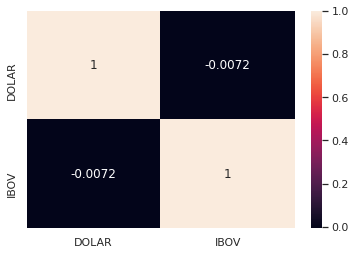

In [ ]:
# Gráfico de correlação comparando os retornos
sns.heatmap(retornos.corr(), annot=True);

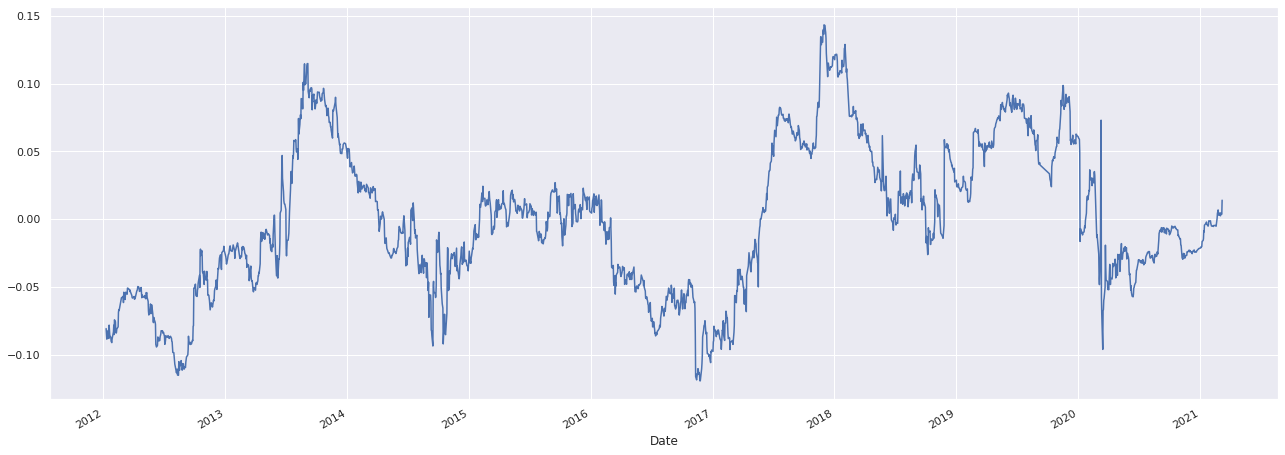

In [ ]:
# Gráfico da correlação do IBOV e Dollar

retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

In [ ]:
# Cria coluna do IBOV Dolarizado
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2011-01-03,1.6155,69962.000000,43306.716903
2011-01-04,1.6465,70318.000000,42707.561717
2011-01-05,1.6675,71091.000000,42633.282871
2011-01-06,1.6750,70579.000000,42136.717617
2011-01-07,1.6859,70057.000000,41554.659900
...,...,...,...
2021-03-03,5.6751,111184.000000,19591.549566
2021-03-04,5.6175,112690.000000,20060.525758
2021-03-05,5.6683,115202.000000,20323.906094


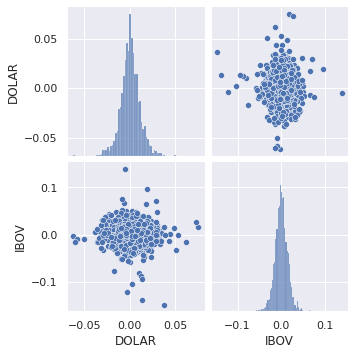

In [ ]:
# Conjunto de Gráficos para análise dos retornos
sns.pairplot(retornos);